In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [28]:
df = pd.read_csv('Population_Colorado.csv')

In [29]:
denver_pop = df[df['county'] == 'Denver'].copy()

In [30]:
denver_pop_yr = denver_pop.groupby('year').sum()

denver_pop_yr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1990 to 2040
Data columns (total 5 columns):
fipsCode            51 non-null int64
age                 51 non-null int64
malePopulation      51 non-null int64
femalePopulation    51 non-null int64
totalPopulation     51 non-null int64
dtypes: int64(5)
memory usage: 2.4 KB


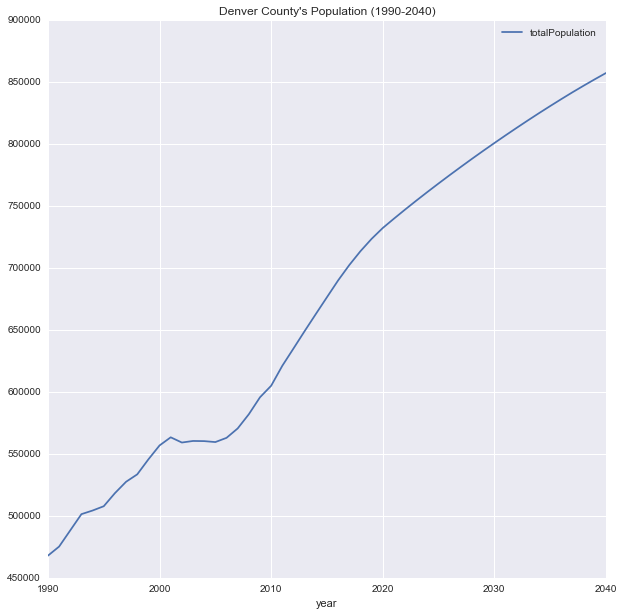

In [31]:
denver_pop_yr.plot(y = 'totalPopulation', figsize = (10,10),
                   title="Denver County's Population (1990-2040)")
plt.savefig('plots/denver_pop.png')

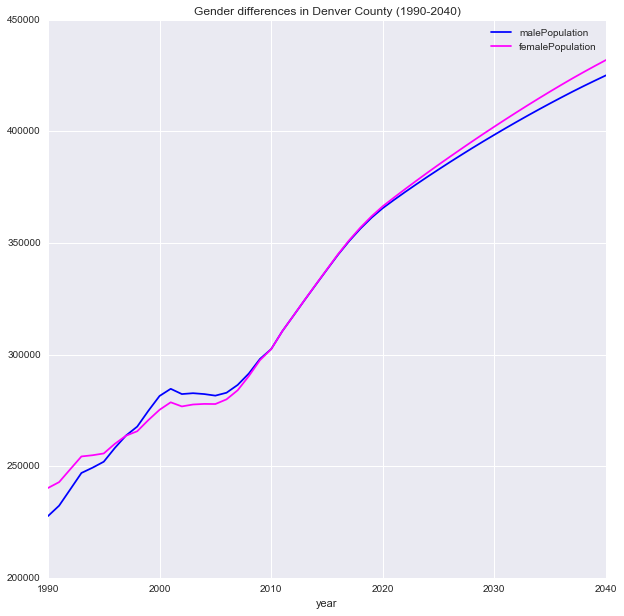

In [32]:
colors = ['#0000FF', '#FF00FF']

denver_pop_yr.plot(y = ['malePopulation', 'femalePopulation'], figsize = (10,10),
                   title = 'Gender differences in Denver County (1990-2040)',
                   color = colors)
plt.savefig('plots/denver_gender.png')

In [33]:
bins = [0, 21, 34,44,54,64,90]
print bins


denver_pop['age_groups'] = pd.cut(denver_pop['age'], bins, right=False)

[0, 21, 34, 44, 54, 64, 90]


In [34]:
denver_pop_cats = denver_pop.groupby(['year', 'age_groups']).sum()
#denver_pop_cats
#denver_pop_cats.pivot(index = 'year', columns='cats', values='totalPopulation')

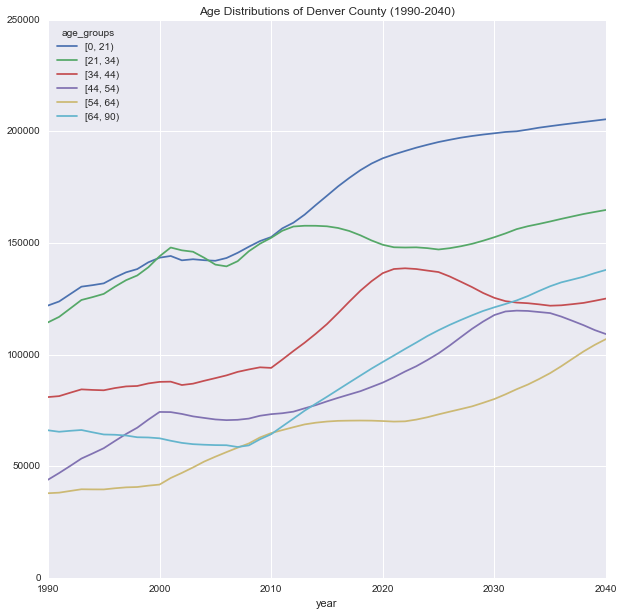

In [35]:
title = 'Age Distributions of Denver County (1990-2040)'

denver_pop_cats.unstack('age_groups')['totalPopulation'].plot(figsize=(10,10), title=title)
plt.savefig('plots/denver_age.png')